In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [117]:
!pip install tweepy

In [118]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
consumer_key = 'iVZWGWlqz0BzRdEL1qVy9eyMT'
consumer_key_secret = 'Va5S4hYeN058ULjkAUm1lXpXMH0HLCRDXOx4YTuELj7xi9HUgI'
access_token = '1335810789203091459-AUdoKUETQQcU9s4YBC4shrAzQRi4yc'
access_token_secret = 'UJtSd06GeBXwlvtRUAnAy9dTBqBK3tHUCbjB7v5lp6Exp'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [120]:
query = 'Pilkada'
max_tweets = 100
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query).items(max_tweets)]

In [121]:
pos = 0
neg = 0
neu = 0
for tweet in searched_tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  0
Total Negative =  0
Total Neutral =  100


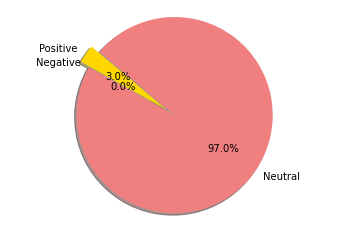

In [122]:

labels = 'Positive', 'Negative', 'Neutral'
sizes = [3, 0, 97]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [123]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_data.csv')

In [124]:
tweet_dataset.shape

(100, 5)

In [125]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1338393774792163329,Pilkada kemarin berlangsung dengan sukses. Pil...,0,0,Mon Dec 14 08:01:56 +0000 2020
1,1338393767871610881,Seluruh ketegasan dari @KejaksaanRI dan apara...,0,0,Mon Dec 14 08:01:55 +0000 2020
2,1338393764746825728,Anggota Komisi II DPR RI Junimart Girsang Apre...,0,0,Mon Dec 14 08:01:54 +0000 2020
3,1338393762741948421,RT @denni_sauya: PILKADA SERENTAK 2020 SUKSES\...,0,8,Mon Dec 14 08:01:53 +0000 2020
4,1338393760707665920,Berharap semua tahapan Pilkada tetap mematuhi ...,0,0,Mon Dec 14 08:01:53 +0000 2020


In [126]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

tweet_dataset['text'] = np.vectorize(remove_pattern)(tweet_dataset['text'], "@[\w]*")

In [127]:
tweet_dataset.head()

,tweet_id,text,favorite_count,retweet_count,created_at
0,1338393774792163329,Pilkada kemarin berlangsung dengan sukses. Pil...,0,0,Mon Dec 14 08:01:56 +0000 2020
1,1338393767871610881,Seluruh ketegasan dari dan aparat Kejaksaan ...,0,0,Mon Dec 14 08:01:55 +0000 2020
2,1338393764746825728,Anggota Komisi II DPR RI Junimart Girsang Apre...,0,0,Mon Dec 14 08:01:54 +0000 2020
3,1338393762741948421,RT : PILKADA SERENTAK 2020 SUKSES\n\nTak lepas...,0,8,Mon Dec 14 08:01:53 +0000 2020
4,1338393760707665920,Berharap semua tahapan Pilkada tetap mematuhi ...,0,0,Mon Dec 14 08:01:53 +0000 2020


In [128]:
tweet_dataset['text'].head()

0    Pilkada kemarin berlangsung dengan sukses. Pil...
1    Seluruh ketegasan dari   dan aparat Kejaksaan ...
2    Anggota Komisi II DPR RI Junimart Girsang Apre...
3    RT : PILKADA SERENTAK 2020 SUKSES\n\nTak lepas...
4    Berharap semua tahapan Pilkada tetap mematuhi ...
Name: text, dtype: object

In [129]:
corpus = []
for i in range(0, 100):
    tweet = re.sub('[^a-zA-Z0-9]', ' ', tweet_dataset['text'][i])
    tweet = tweet.lower()
    tweet = re.sub('rt', '', tweet)
    tweet = re.sub('http', '', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = tweet.split()
    ps = PorterStemmer()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [130]:
#Term Freuency - TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweet_dataset['text'])
#Count Most Frequent Words
Counter = Counter(corpus)
most_occur = Counter.most_common(10) 
print(most_occur)

[('berharap semua tahapan pilkada tetap mematuhi protokol kesehatan agar terhindar dari corona prokespilkadasuks', 3), ('masyarakat patuhi protk pilkada sapu bersih kovid amp radik bubarkanfpiormasanarki', 2), ('pilkada kemarin berlangsung dengan suks pilkada yang dikhawatirkan jadi klaster baru covid tidak terbukti brav co wg7nmppzpj', 1), ('seluruh ketegasan dari dan aparat kejaksaan di seluruh indonesia yang wilayah hukumnya menyelenggarak co 8b55b2jgfb', 1), ('anggota komisi ii dpr ri junima girsang apreasiasi suks pilkada prokespilkadasuks co rieser9oj1', 1), ('pilkada serentak 2020 suks tak lepa dari masifnya sosialisasi penyelenggara pemilu amp pemerintah yg berhasil membuat', 1), ('berharap semua tahapan pilkada tetap mematuhi protokol kesehatan agar terhindar dari corona prokespilkadasuks co vcedofjcxm', 1), ('apreasiasi pilkada suks dari berbagai kalangan termasuk dari pimpinam lembaga negara prokespilkadasuks co dn3xvcbwnl', 1), ('apreasiasi pilkada suks dari berbagai kalang

In [131]:
target_variable = tweet_dataset['text'].apply(lambda x: 0 if x=='Golkar' else 1 )

In [132]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())
    
    # calculating f1 score
    print(f'F1 Score - {f1_score(y_test, predictions)}')

In [133]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, target_variable, test_size=0.3, random_state=870)
naive_model(X_train, X_test, y_train, y_test)

F1 Score - 1.0


In [135]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



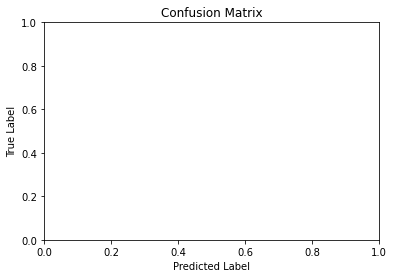

In [137]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
knn_pred = classifier.predict(X_test)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()